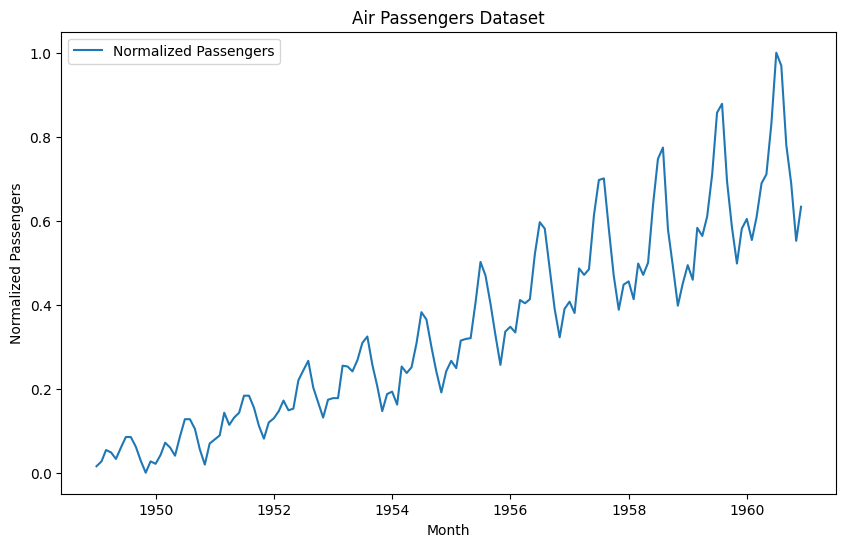

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the Air Passengers dataset
data = pd.read_csv('AirPassengers.csv')

# Preprocessing
# Convert 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Normalize the data
scaler = MinMaxScaler()
data['Passengers_normalized'] = scaler.fit_transform(data[['#Passengers']])

# Split into training and test sets
train_data, test_data = train_test_split(data['Passengers_normalized'], test_size=0.2, shuffle=False)

# Optional: Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Passengers_normalized'], label='Normalized Passengers')
plt.title('Air Passengers Dataset')
plt.xlabel('Month')
plt.ylabel('Normalized Passengers')
plt.legend()
plt.show()

In [13]:
2 from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the LSTM-based model
def create_lstm_model(input_shape, num_units, num_layers, dropout_rate):
    model = Sequential()

    # Add the first LSTM layer with input_shape parameter
    model.add(LSTM(units=num_units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))  # Add dropout to the first layer

    # Add additional LSTM layers based on num_layers
    for _ in range(num_layers - 1):
        model.add(LSTM(units=num_units, return_sequences=True))
        model.add(Dropout(dropout_rate))

    # Add a final LSTM layer without return_sequences
    model.add(LSTM(units=num_units))
    model.add(Dropout(dropout_rate))

    # Add a Dense output layer
    model.add(Dense(units=1))

    return model

# Define model parameters

input_shape = (X_train.shape[1], X_train.shape[2])  # Shape of input data (timesteps, features)
num_units = 64  # Number of units in each LSTM layer
num_layers = 2  # Number of LSTM layers
dropout_rate = 0.2  # Dropout rate

# Create the LSTM model
lstm_model = create_lstm_model(input_shape, num_units, num_layers, dropout_rate)

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
print(lstm_model.summary())



AttributeError: 'list' object has no attribute 'shape'

In [14]:
3 # Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'lstm_model' is not defined

In [15]:
4 # Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(train_data, epochs=50, batch_size=32, validation_data=(test_data), verbose=1)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'lstm_model' is not defined

In [16]:
5 # Evaluate the model on the test set
loss = lstm_model.evaluate(test_data)

# Print the loss (MSE or other relevant metrics)
print(f'Test Loss: {loss}')

# Make predictions on the test set
predictions = lstm_model.predict(test_data)

# Visualize the predictions against the ground truth
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions')
plt.plot(test_data, label='Ground Truth')
plt.title('Model Predictions vs. Ground Truth')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


NameError: name 'lstm_model' is not defined

**6** Certainly! Let's discuss each point:

Challenges encountered during model training and optimization:

One common challenge during model training and optimization is finding the right balance between model complexity and generalization. Increasing the complexity of the model by adding more layers or units may lead to overfitting, while simplifying the model may result in underfitting. Finding the optimal set of hyperparameters through techniques like grid search or random search can help mitigate this challenge.
Another challenge is dealing with vanishing or exploding gradients, especially in deep LSTM architectures. This can affect the convergence of the model during training. Techniques like gradient clipping and careful initialization of weights can help address this issue.
Decision on the number of LSTM layers and units:

The decision on the number of LSTM layers and units depends on various factors such as the complexity of the dataset, the presence of long-term dependencies, and computational resources. Generally, deeper architectures with more LSTM layers can capture more intricate patterns and dependencies in the data, but they also require more computational resources and are prone to overfitting. It's essential to strike a balance based on empirical experimentation and validation performance.
Preprocessing steps performed on the time series data:

Preprocessing steps on time series data typically include:
Handling missing values: Removing or imputing missing values to ensure continuity in the time series.
Scaling: Normalizing or standardizing the data to a similar scale to improve the convergence of the optimization algorithm.
Sequence creation: Creating input-output sequences or windows from the time series data to train the LSTM model.
Train-test split: Splitting the dataset into training and test sets to evaluate the model's performance on unseen data.
Purpose of dropout layers in LSTM networks and how they prevent overfitting:

Dropout layers in LSTM networks randomly drop a fraction of connections during training. This helps prevent overfitting by introducing noise and forcing the network to learn more robust features. Dropout regularizes the model by reducing the interdependence between neurons and encourages the network to learn redundant representations, thus improving generalization performance on unseen data.
Model's ability to capture long-term dependencies and make accurate predictions:

LSTM networks are specifically designed to capture long-term dependencies in sequential data, making them well-suited for time series forecasting tasks. By maintaining a cell state and selectively updating it over time, LSTMs can retain information over long sequences and learn complex temporal patterns. The model's ability to capture long-term dependencies and make accurate predictions depends on various factors such as the architecture, hyperparameters, and quality of the training data.
Potential improvements or alternative approaches for enhancing forecasting performance:

Experiment with different architectures: Besides LSTM, consider other recurrent neural network (RNN) architectures such as Gated Recurrent Units (GRUs) or more advanced models like Transformer-based architectures.
Feature engineering: Explore domain-specific features or external variables that may improve forecasting performance when combined with the time series data.
Ensemble methods: Combine predictions from multiple models or ensemble techniques like bagging or boosting to enhance forecasting accuracy.
Attention mechanisms: Incorporate attention mechanisms to allow the model to focus on relevant parts of the input sequence, potentially improving long-term dependency capture.
Transfer learning: Pretrain the LSTM model on a related dataset or task and fine-tune it on the target dataset to leverage knowledge learned from similar domains or tasks.
By addressing these points and exploring alternative approaches, we can further enhance the performance of the LSTM model for time series forecasting tasks.





